# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib inline

In [2]:
dataset = get_dataset("/app/project/data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 96
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    fig, ax = plt.subplots()
    img = batch['image'].numpy()
    ax.imshow(img)
    
    # 1 = vehicle, 2 = pedestrian, 4 = cyclist
    color_dict = {1: 'cyan', 2: 'yellow', 4: 'purple'} 
    
    for bbox, label in zip(batch['groundtruth_boxes'].numpy(), batch['groundtruth_classes'].numpy()):
        y1, x1, y2, x2 = bbox
        xy = (x1*img.shape[0], y1*img.shape[1])
        width = (x2 - x1) * img.shape[0]
        height = (y2 - y1) * img.shape[1]
        rect = Rectangle(xy, width, height, facecolor='none', edgecolor=color_dict[label])
        ax.add_patch(rect)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

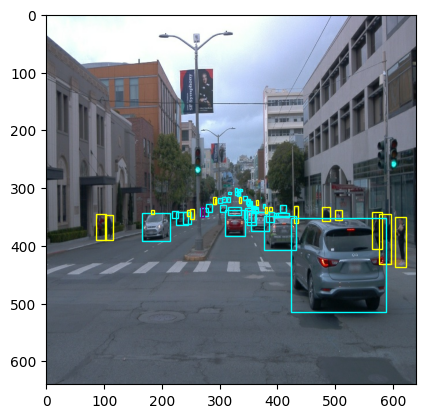

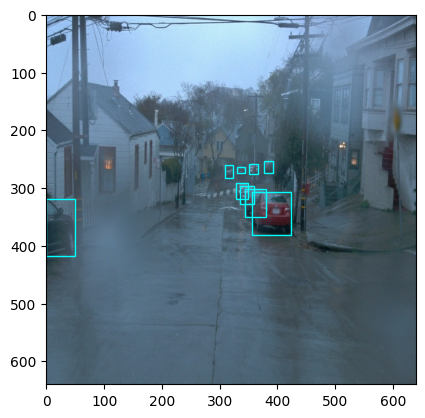

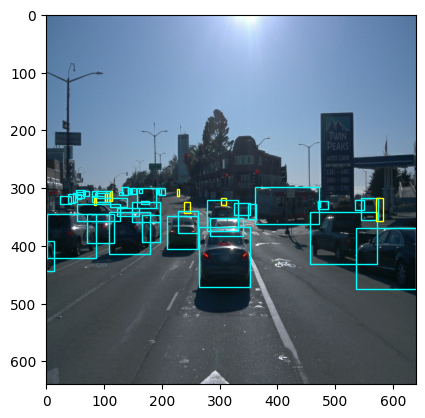

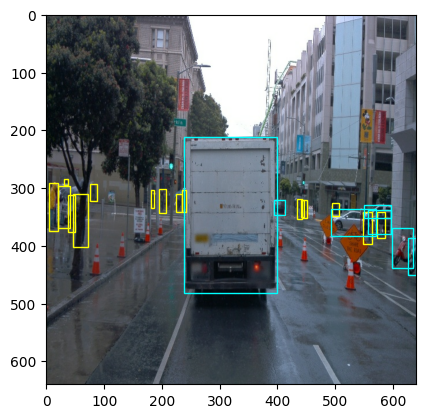

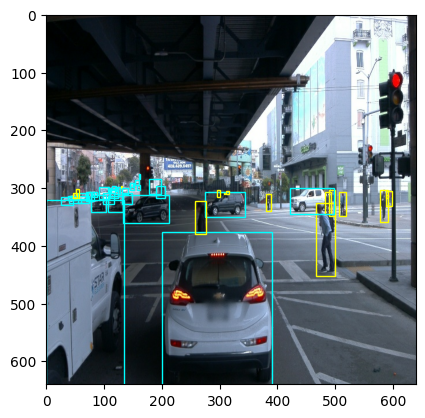

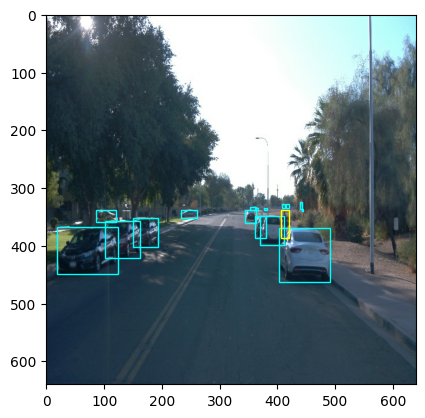

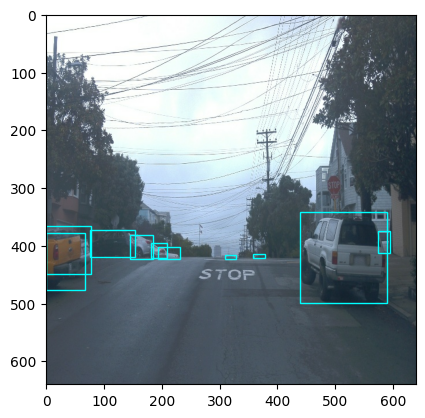

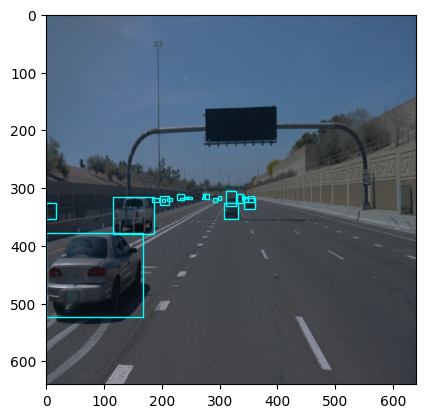

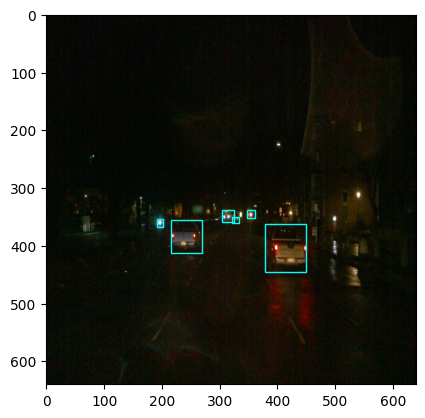

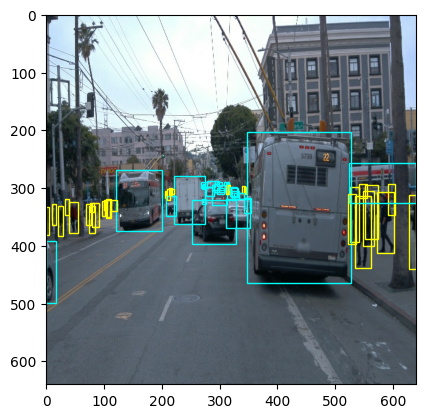

In [36]:
## STUDENT SOLUTION HERE

# Randomly choose 10 images
for batch in dataset.take(10):
    display_instances(batch)


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [6]:
def data_analysis():
    
    class_total_count = {"car": 0, "pedestrian": 0, "cyclist": 0}
    class_total_dist = {"car":[], "pedestrian":[], "cyclist":[]}
    
    
    bbox_count_in_image = {"less than 5": 0, "between 5 and 20": 0, "more than 20": 0}
    bbox_size_total_count = {"less than 100": 0, "between 100 and 1000": 0, "more than 1000": 0}
    
    color_encodings = ['cyan', 'yellow', 'purple']

    for data in dataset.take(20000):
              
        # initialize with zero the distribution for every class in every frame  
        for key in class_total_dist.keys():
            class_total_dist[key].append(0)

        # check class
        labels = data['groundtruth_classes'].numpy()
        for label in labels:
            if label == 1:
                class_total_count["car"] += 1
                class_total_dist["car"][-1] += 1
            elif label == 2:
                class_total_count["pedestrian"] += 1
                class_total_dist["pedestrian"][-1] += 1
            else:
                class_total_count["cyclist"] += 1
                class_total_dist["cyclist"][-1] += 1

        bboxes = data['groundtruth_boxes'].numpy()
        # check the number of bboxes
        box_count = len(bboxes)
        if box_count < 10:
            bbox_count_in_image["less than 5"] += 1
        elif box_count >= 10 and box_count < 30:
            bbox_count_in_image["between 5 and 20"] += 1
        else:
            bbox_count_in_image["more than 20"] += 1

        # check bbox size
        for bbox in bboxes:
            y1, x1, y2, x2 = bbox
            y1 = y1 * 640
            x1 = x1 * 640
            y2 = y2 * 640
            x2 = x2 * 640
            area = (y2 - y1) * (x2 - x1)
            if area < 100:
                bbox_size_total_count["less than 100"] += 1
            elif area >= 100 and area < 10000:
                bbox_size_total_count["between 100 and 1000"] += 1
            else:
                bbox_size_total_count["more than 1000"] += 1

    
    # plot number of objects vs object class
    fig1, ax1 = plt.subplots()
    bar1 = ax1.bar([0,1,2], list(class_total_count.values()),
                   width=0.5, color=color_encodings, tick_label=list(class_total_count.keys()))

    ax1.set_ylabel('Number of Objects')
    ax1.set_title('Object Class')
    ax1.set_xticks([0, 1, 2])
    ax1.set_xticklabels(list(class_total_count.keys()))
    plt.show()



    # plot number of images vs number of bboxes per image
    fig2, ax2 = plt.subplots()
    bar2 = ax2.bar([0,1,2], list(bbox_count_in_image.values()),
                   width=0.5,tick_label=list(bbox_count_in_image.keys()))

    ax2.set_ylabel('Number of Images')
    ax2.set_title('Bounding Boxes Count per Image')
    plt.show()

    # plot number of bboxes vs bbox size 
    fig3, ax3 = plt.subplots()
    bar3 = ax3.bar([0,1,2], list(bbox_size_total_count.values()),
                   width=0.5, tick_label=list(bbox_size_total_count.keys()))
    ax3.set_ylabel('Number of Bounding Boxes')
    ax3.set_title('Bounding Box Size in pixels')
    plt.show()

    
    
    
    # plot charts with the frequency distibution of every class label in the images
    fig, ax = plt.subplots(3, 1, figsize=(20,20))

    for i, key in enumerate(list(class_total_dist.keys())):
        ax[i].hist(class_total_dist[key], bins=range(min(class_total_dist[key]), max(class_total_dist[key])))
        ax[i].set_title("Class " + str(key))
        ax[i].set_ylabel("Number of images")
        ax[i].set_xlabel("Frequency of labels")

    plt.show()
    
    



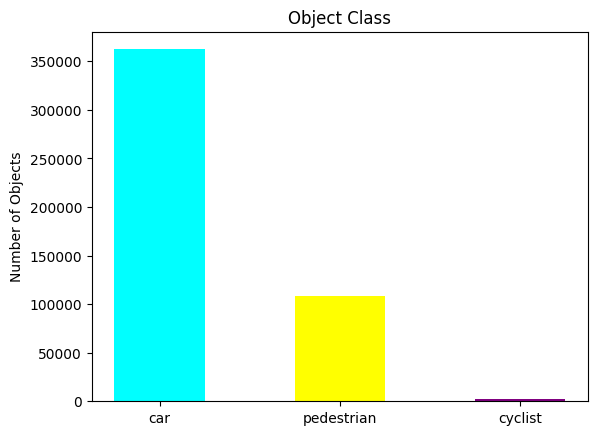

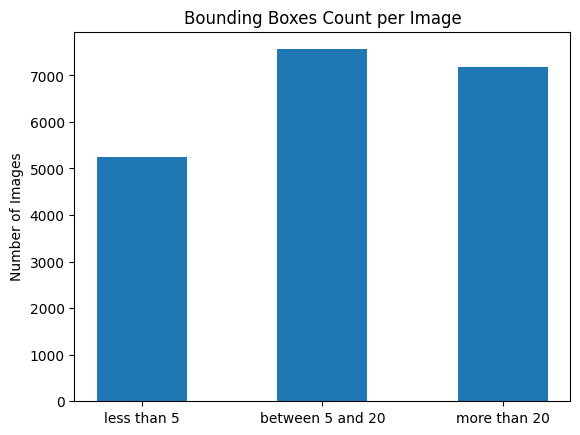

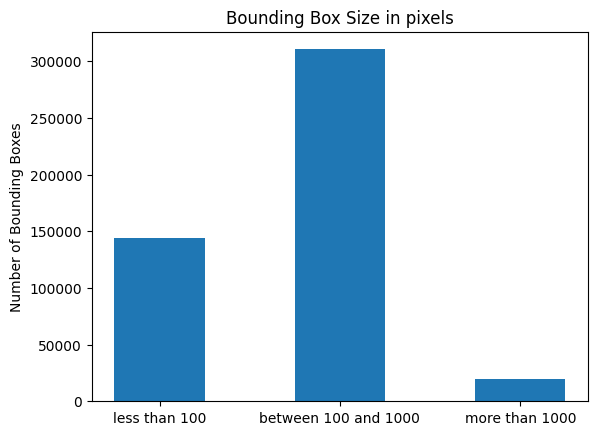

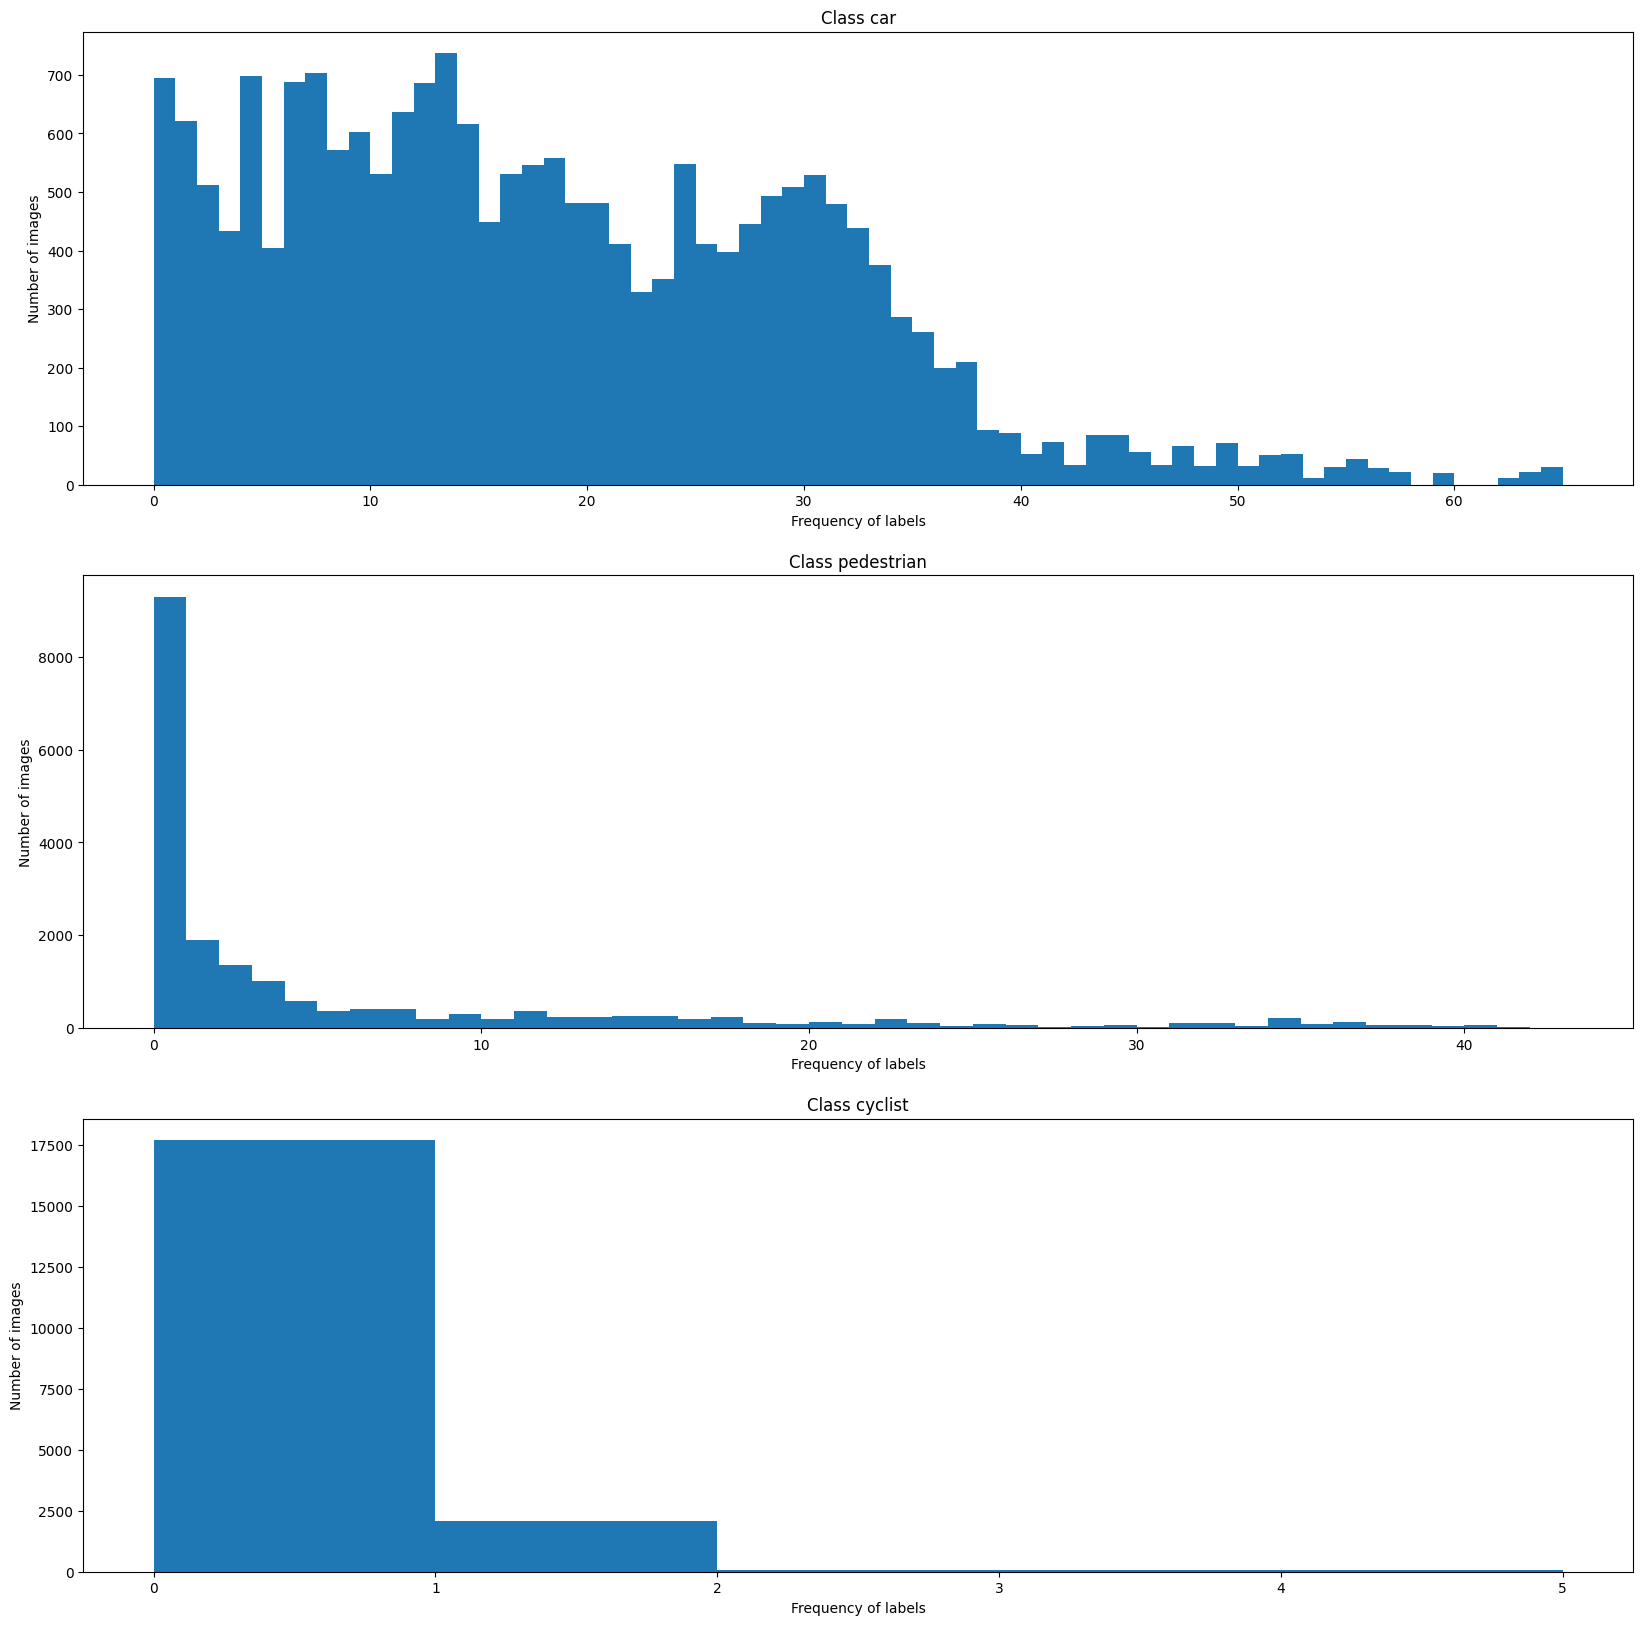

In [7]:
data_analysis()